## Final Project Submission

Please fill out:
* Student name: Barrett Yeretzian
* Student pace: self paced 
* Scheduled project review date/time: 10/31/2018 11 AM PST
* Instructor name: Eli


# Obtaining Data

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

### Loading/Observing the data

In [2]:
df = pd.read_csv("./kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Initial Observations:
This dataset contains multiple variables desribing the characteristics of homes in King County.
I immediately that some columns are encoded incorrectly.

I believe "sqft_basement" and "yr_renovated" should each contain integer values. "Waterfront" should be converted to bool.

Also, the "date" and "id" columns are unneccesary since time series data will not be used in this project and since the listing's ID number would have no affect on its value. I decide to drop these columns. 

Finally, the "condition", "view", "grade", and "zipcode" columns are probably categorical, so I will check to make sure that the values within them are appropriate and change the datatype of these columns as well. 

# Scrubbing Data

First, I check for null values in the dataframe.

In [5]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
print('waterfront:',df['waterfront'].isna().sum(), 'view:', df['view'].isna().sum(), 'yr_renovated:', df['yr_renovated'].isna().sum())

waterfront: 2376 view: 63 yr_renovated: 3842


I decide to replace the null values in each column with its median value and make sure there are no longer null values.

In [7]:
df['waterfront'].fillna((df['waterfront'].median()), inplace = True)
df['view'].fillna((df['view'].median()), inplace = True)
df['yr_renovated'].fillna((df['yr_renovated'].median()), inplace = True)

In [8]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

### Converting datatypes

First, I try to change "sqft_basement" to an integer.

In [9]:
df['sqft_basement'] = df['sqft_basement'].astype('int64')

ValueError: invalid literal for int() with base 10: '0.0'

Since '0.0' cannot be converted to an integer, I try to convert it to a float first, then back to an integer.

In [10]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

ValueError: could not convert string to float: '?'

It looks like there are some missing values in the column, so I will see how many there are and decide how to deal with them.

In [11]:
len(df.loc[df['sqft_basement'] == '?'])

454

There are 454 rows where the column has a missing value, and this is only 2.1% of the data. I believe dropping these rows would be acceptable.

In [12]:
df = df[df['sqft_basement'] != '?']
df['sqft_basement'] = df['sqft_basement'].astype('float64')
df['sqft_basement'] = df['sqft_basement'].astype('int64')

In [13]:
df['floors'] = df['floors'].astype('int64')

In [14]:
df['yr_renovated'] = df['yr_renovated'].astype('int64')

In [15]:
df['waterfront'] = df['waterfront'].astype('bool')

In [16]:
df.drop('date', axis = 1, inplace = True)
df.drop('id', axis =1, inplace = True)

### Dealing with categorical variables

First, I look at a scatterplot of each variable and its relation to the response.

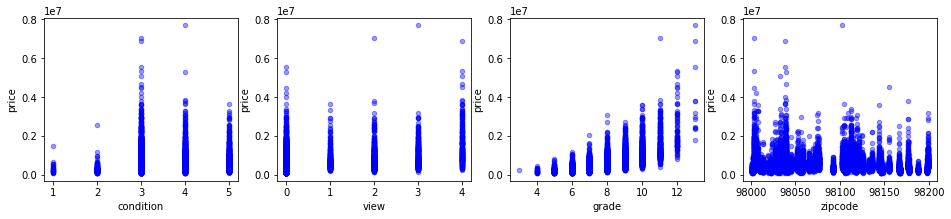

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['condition', 'view', 'grade', 'zipcode'], axes):
    df.plot(kind='scatter', x= xcol, y='price', ax=ax, alpha=0.4, color='b')

It is hard to determine a linear relationship between 'price' and all of these predictors except for 'grade,' so I believe transforming them into categories would be beneficial in this analysis.

In [18]:
df['condition'] = df['condition'].astype('category', ordered = True, categories = [1,2,3,4,5])

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [19]:
df['view'] = df['view'].astype('int')
df['view'] = df['view'].astype('category', ordered = True, categories = [0,1,2,3,4])

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


It also seems that the "grade" column should be categorical as well. To proceed, I check the unique values in the column.

In [20]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [21]:
df['grade'] = df['grade'].astype('category', ordered = True, categories = [3,4,5,6,7,8,9,10,11,12,13])

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


I change the zipcode column to string, since no numerical relationship exists between the values then make this a categorical variable as well.

In [22]:
df['zipcode'] = df['zipcode'].astype('str')
df['zipcode'] = df['zipcode'].astype('category')

Now that the datatypes are fixed and null values are dealt with, I can go forward with checking for multicollinearity in the data by creating a heatmap of the correlation matrix.

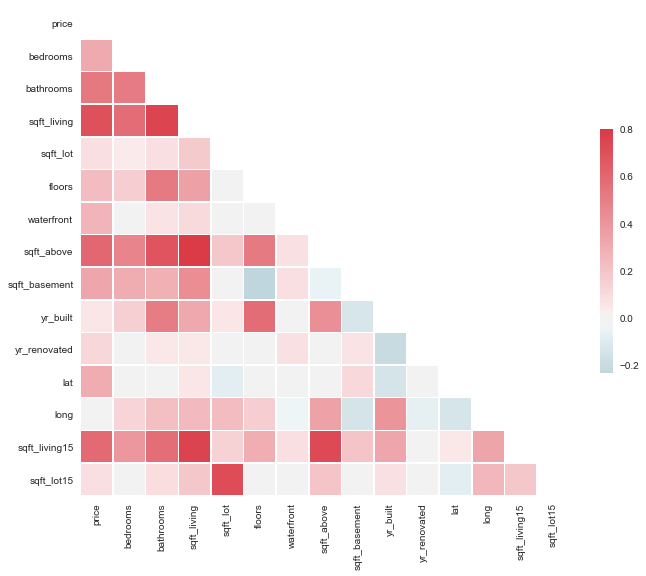

In [27]:
sns.set(style="white")

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It is hard to determine exactly which predictors are most correlated with each other, but it seems that sqft_living has the most multicorrelation. I choose 0.75 as the cut-off for correlation, and create a matrix that will tell me which variables pass this threshold.

In [28]:
data_pred = df.iloc[:,1:]
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,True,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False


I decide to drop the 'sqft_living' column since it has high correlation with 3 other predictors.

In [29]:
df.drop('sqft_living', axis = 1, inplace = True)

# Exploring Data

I start by plotting histograms for each of the columns to take a look at the way they are distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1578cc88>,
      dtype=object)

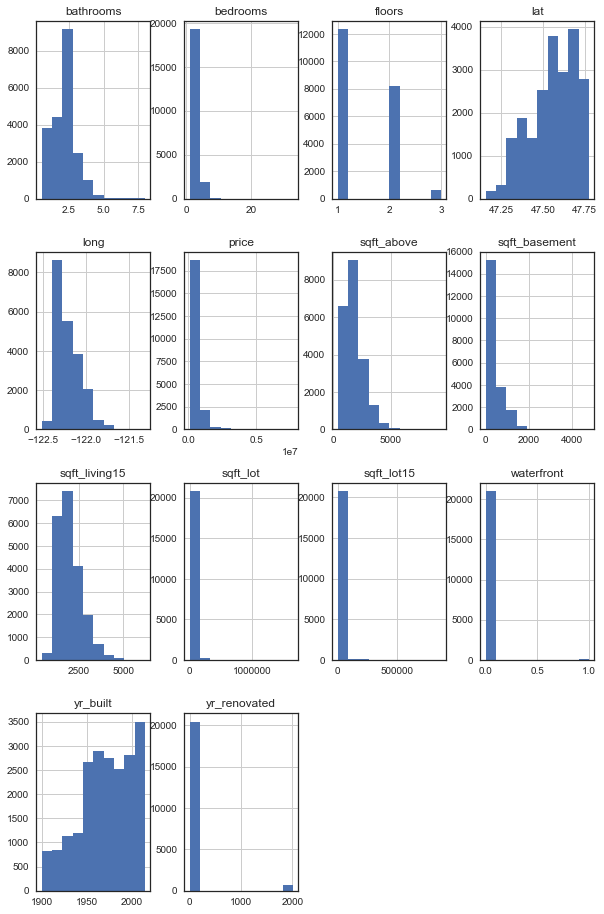

In [30]:
df.hist(figsize = (10,16))

Most of the columns don't satisfy the normality assumption, and there are some outliers. First, I normalize the appropriate variables with a log-transformation. I'm not sure yet what to do about the "sqft_lot15" and "sqft_lot" columns.

In [31]:
for column in ['price', 'sqft_lot', 'sqft_above',
       'sqft_living15', 'sqft_lot15', 'bathrooms', 'bedrooms', 'yr_built']:
    df[column] = np.log(df[column])

The predictors look much better, except for "yr_built", "lat", and "long". For these three, I will try scaling. Also, since 'sqft_basement' and 'yr_renovated' could not be log transformed, I will try standardizing it.

In [32]:
df['yr_built'] = (df['yr_built']-np.mean(df['yr_built']))/(max(df['yr_built'])-min(df['yr_built']))
df['lat'] = (df['lat']-np.mean(df['lat']))/(max(df['lat'])-min(df['lat']))
df['long'] = (df['long']-np.mean(df['long']))/(max(df['long'])-min(df['long']))
df['sqft_basement'] = (df['sqft_basement']-np.mean(df['sqft_basement']))/np.std(df['sqft_basement'])
df['yr_renovated'] = (df['yr_renovated']-np.mean(df['yr_renovated']))/np.std(df['yr_renovated'])

Now, I plot normalized histograms and KDEs for the numerical variables

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


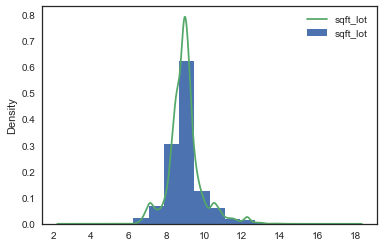

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


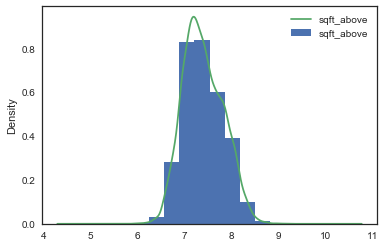

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


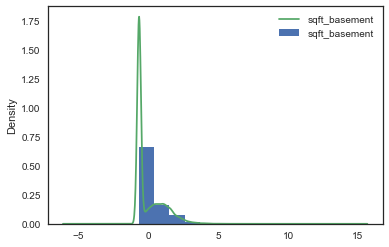

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


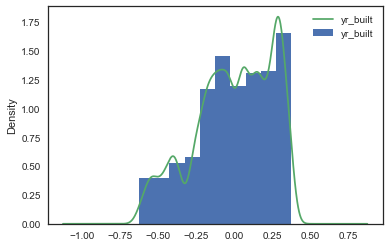

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


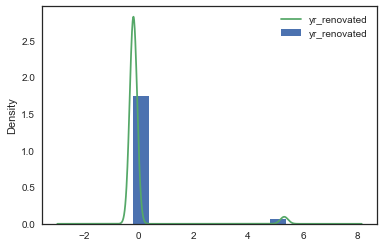

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


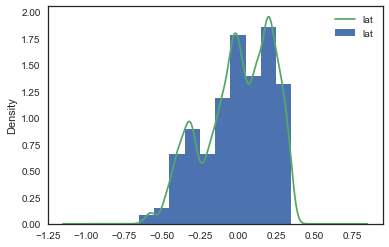

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


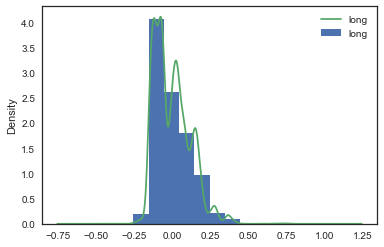

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


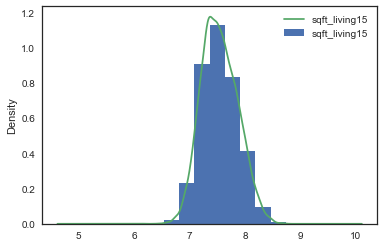

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


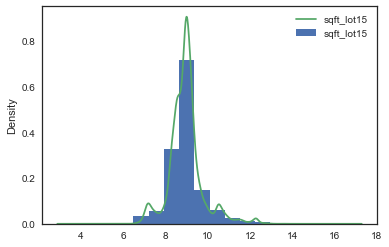

In [33]:
for column in ['sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']:
    df[column].plot.hist(normed=True )
    df[column].plot.kde(label=column )
    plt.legend()
    plt.show()

Some columns are multimodal and skewed. However, I still proceed to inspect the linearity and normality of these columns.

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


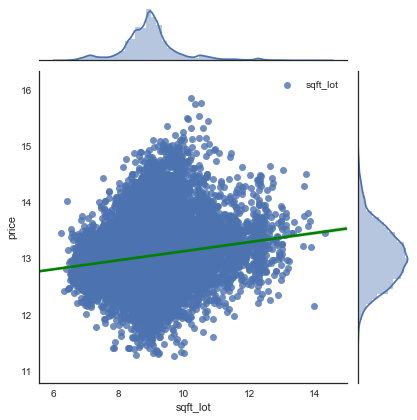

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


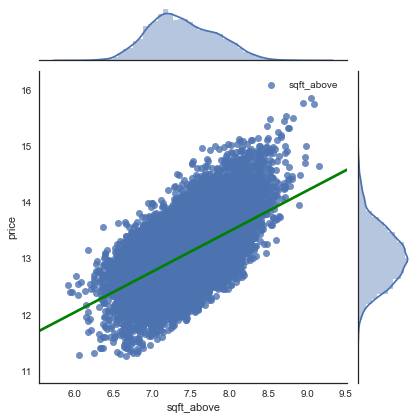

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


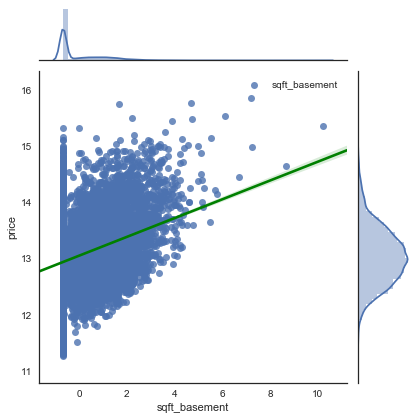

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


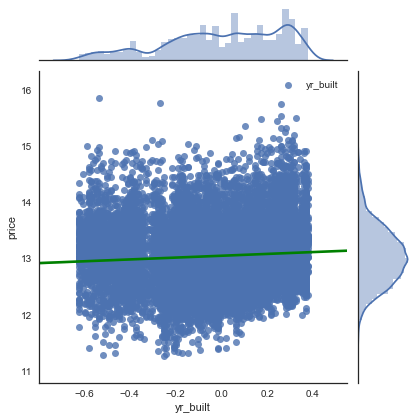

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


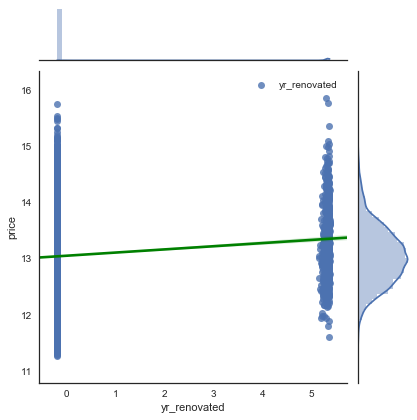

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


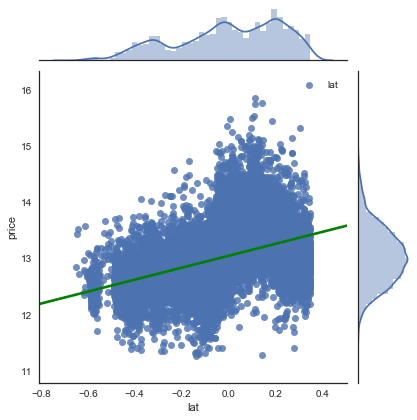

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


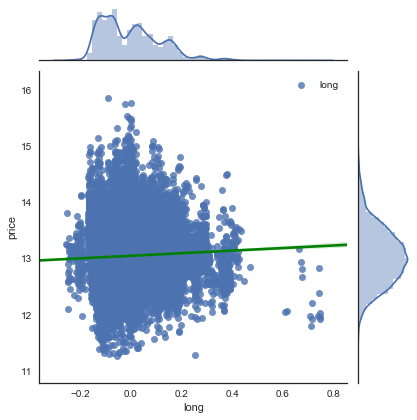

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


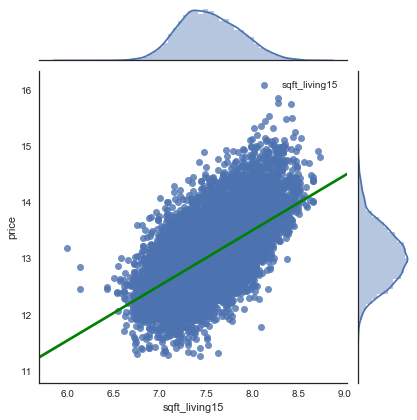

/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/byeretzian/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


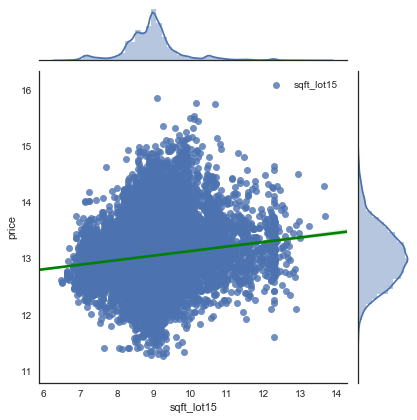

In [34]:
for column in [ 'sqft_lot', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

All of the columns except "yr_built,", "yr_renovated", "zipcode," and "long" have relatively strong positive correlation with the price of the homes. Before I move on, I use one-hot encoding for the categorical variables.

In [35]:
df = pd.get_dummies(df)

# Modeling Data

In [36]:
df['waterfront'] = df['waterfront'].astype('category')

In [38]:
for col in df.iloc[:,14:].columns:
    df[col] = df[col].astype('category')

In [39]:
df.describe().columns.drop(['price'])

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

I now fit a linear model of each numerical predictor with price as the response, log the r_squared, intercept, slope, and p-value of each model, and present these values in a dataframe.

In [40]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("KC: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

KC: price~bedrooms
------------------------------
['bedrooms', 0.11724020654253753, 12.296912450630877, 0.6380811537396441, 0.0]
KC: price~bathrooms
------------------------------
['bathrooms', 0.27016869749182615, 12.575205858973012, 0.698106461679816, 0.0]
KC: price~sqft_lot
------------------------------
['sqft_lot', 0.019144831080816327, 12.321481381692458, 0.0808538179390863, 7.190150559984549e-91]
KC: price~floors
------------------------------
['floors', 0.08172904975963191, 12.653544971023933, 0.27315514823819753, 0.0]
KC: price~sqft_above
------------------------------
['sqft_above', 0.3430595932470991, 7.706088773310778, 0.7223843635957168, 0.0]
KC: price~sqft_basement
------------------------------
['sqft_basement', 0.10085487218142264, 13.048426828182372, 0.16724912505950792, 0.0]
KC: price~yr_built
------------------------------
['yr_built', 0.006269717771697714, 13.048426828180975, 0.16412008934309874, 9.214856398236143e-31]
KC: price~yr_renovated
------------------------

In [41]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.11724,12.2969,0.638081,0
2,bathrooms,0.270169,12.5752,0.698106,0
3,sqft_lot,0.0191448,12.3215,0.0808538,7.19015e-91
4,floors,0.081729,12.6535,0.273155,0
5,sqft_above,0.34306,7.70609,0.722384,0
6,sqft_basement,0.100855,13.0484,0.167249,0
7,yr_built,0.00626972,13.0484,0.16412,9.21486e-31
8,yr_renovated,0.011473,13.0484,0.0564096,5.42343e-55
9,lat,0.201852,13.0484,1.06142,0


Looking at the R-squared values, I think I will drop 'long' and 'yr_built' since they are the only ones below 0.01.

In [42]:
df_final = df.drop(['long', 'yr_built'], axis = 1)

Now, I create models with the categorical variables.

In [48]:
cols_waterfront = df.columns[5:6]
cols_view = df.columns[14:19]
cols_condition = df.columns[19:24]
cols_grade = df.columns[24:35]
cols_zipcode = df.columns[35:105] 

cols = [cols_waterfront, cols_view, cols_condition, cols_grade, cols_zipcode]
for col in cols:
    sum_cols = "+".join(col)
    form = "price ~" + sum_cols
    model = smf.ols(formula= form, data= df).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     634.2
Date:                Tue, 30 Oct 2018   Prob (F-statistic):          6.70e-138
Time:                        09:50:36   Log-Likelihood:                -16131.
No. Observations:               21143   AIC:                         3.227e+04
Df Residuals:                   21141   BIC:                         3.228e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.0410      0

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     345.5
Date:                Tue, 30 Oct 2018   Prob (F-statistic):               0.00
Time:                        09:50:36   Log-Likelihood:                -8442.5
No. Observations:               21143   AIC:                         1.703e+04
Df Residuals:                   21073   BIC:                         1.758e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.8730      0

Each of the R-squared values is above 0.01, but a few of the variables have p-values greater than 0.05. For this reason, I will drop condition, view, and grade. Additionally, I will drop a few of the zipcode columns (98166, 98155, 98126, 98118, 98056, 98045, 98019, 98014, 98010)

In [49]:
df_final.drop(df_final.iloc[:,12:33], axis = 1, inplace = True)

In [50]:
df_final.drop(['zipcode_98166', 'zipcode_98155', 'zipcode_98126', 'zipcode_98118', 'zipcode_98056',
               'zipcode_98045','zipcode_98019', 'zipcode_98014', 'zipcode_98010'], axis = 1, inplace = True)

In [51]:
y = df_final['price']
X = df_final.drop('price', axis = 1)

Now, I use feature ranking to see what ammount of predictors would be the best choice for my final model.

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [53]:
r_list = []
adj_r_list = []
list_n = list(range(5,70,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(n , r_squared, adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

5 0.5897173032832512 0.5883152931188655
15 0.7174559824776454 0.7164904784785182
25 0.7823495727842991 0.7816058219176863
35 0.7922812965669239 0.7915714841963885
45 0.8070245941982399 0.8063651623416795
55 0.8446636354362829 0.8441328229897433
65 0.8512815229780009 0.8507733250498763


It looks like the more features we add, the higher both R-squared and adjusted R-squared become. Also, the difference between the two shrinks. I now conduct a train-test split. 

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,75,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(n, mse_train, mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)

5 0.11435225196013239 0.1116650379895709
15 0.07874251516354394 0.0769332790728786
25 0.061384219287890555 0.05861524338354994
35 0.05855937163947672 0.056129526891149216
45 0.05401901080277914 0.051673875393973154
55 0.04355922275578634 0.04258154815445697
65 0.041461666981450075 0.04055244948261001


The MSE keeps improving as more predictors are added, so it seems like the largest model would be a good choice. To confirm, I run a 10-fold cross-validation to see a list of MSEs for each fold.

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

select_65 = RFE(linreg, n_features_to_select = 65)
select_65 = select_n.fit(X, np.ravel(y))
selected_columns = X.columns[select_n.support_]

cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.04037199, -0.04485992, -0.04330751, -0.04198265, -0.03993926,
       -0.04297644, -0.04202567, -0.04418275, -0.04343589, -0.03355162])

Each MSE is less than |0.05|, so I think this model appropriate. 

## Model Explanation
I chose this model by first examining the distributions of the predictors and response and transforming them to achieve data that is most nearly normally distributed. I dropped variables that had little to no affect on the response as well as the one that violated my multicollinearity limit. Finally, I ran feature selection to decide how many predictors would give me the best model. Since the model with 65 predictors had the greatest values for R-squared and adjusted R-squared along with manageable MSEs for each of the ten folds of cross-validation, I believe this model is interpretable and accurate. Basically, the predictors in this model can account for 85% of the variability in housing prices.

I check which columns were chosen to further analyze them.

In [329]:
list(X[selected_columns])

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'waterfront',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15',
 'zipcode_98001',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98011',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98107',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98133',
 'zipcode_98136',
 'zipcode_98144',
 'zi

# Questions
## 1. What are the min, max, and mean predicted values for home price based on this model?
I believe answering this question should be the first question asked by a person shopping for a home. Before even starting a search and considering which characteristics of a home are most important, it is essential to get an idea of the price range.

In [75]:
from math import exp
model = linreg.fit(X[selected_columns],y)
predictions = linreg.predict(X[selected_columns])
print('min:', exp(min(predictions)), 'max:', exp(max(predictions)), 'mean:', exp(np.mean(predictions)))

min: 122527.76278355901 max: 8426654.458815545 mean: 464365.31032613036


### 2. I have a house with 3 bedrooms and 4 bathrooms in the zipcode 98065. How much might I be able to sell this house for ?
This question is more specific, and it accounts for the price one might expect to sell this home for. 

In [60]:
intercept = model.intercept_

In [121]:
zip_ind = (list(X[selected_columns])).index("zipcode_98065")
zipcode_coeff = model.coef_[zip_ind]
bed_ind = (list(X[selected_columns])).index("bedrooms")
bed_coeff = model.coef_[bed_ind]
bath_ind = (list(X[selected_columns])).index("bathrooms")
bath_coeff = model.coef_[bath_ind]

In [140]:
print(bath_coeff)

0.08272564333192728


In [137]:
base_ind = (list(X[selected_columns])).index("sqft_basement")
base_coeff = model.coef_[base_ind]
print(base_coeff)

0.09173432161236858


In [122]:
Price = (intercept) + (3*exp(bed_coeff)) + (4*exp(bath_coeff)) + zipcode_coeff
print(exp(Price))

947307.3364807885


### 3. Which predictor has the largest positive affect on the price of a home?
I believe this is an important question because one may want to consider not choosing a home with a specific characteristic that may greatly incease its price.

In [125]:
max_coeff = max(model.coef_)
max_ind = list(model.coef_).index(max_coeff)
max_pred = list(X[selected_columns])[max_ind]
print(max_coeff)
print(max_pred)

0.9551787444350757
zipcode_98039


## Predictor Analysis

### Waterfront homes


In [129]:
wf_ind = (list(X[selected_columns])).index("waterfront")
wf_coeff = model.coef_[wf_ind]
print(wf_coeff)

0.6844131687452333


A home costs 1.68 times more if it is watefront than not. This could be a pivotal factor in building/selling a home for profit.

## Zipcodes

In [130]:
min_coeff = min(model.coef_)
min_ind = list(model.coef_).index(min_coeff)
min_pred = list(X[selected_columns])[min_ind]
print(min_coeff)
print(min_pred)

-0.39255163550815275
zipcode_98023


Above, we saw that the zipcode 98039 is the most expensive zipcode, and here we see that 98023 is the least expensive. Being in the zipcode 98039 increases a home's price 95%  while being in zipcode 98023 decreases a home's price by 39%

# OSEMN Framework

I obtained the data from the .csv file provided and created a DataFrame to use for this project. Basically, this data included multiple variables that could affect housing prices. The stakeholders are home-owners looking to sell, and recieving a high sale price with little cost is of importance to them. The process of scrubbing the data included removing the variables that would not be of interest, including date and ID of listings. Also, I corrected the datatypes of multiple columns based on the information they provided and dealt with null values by either replacing them with column medians to avoid losing data or deleting rows with missing values if the ammount of rows lost would not greatly impact the dataset.

To explore the data, I started by plotting histograms of each column to see how they were distributed and transforming them accordingly to achieve normally distributed data. Also, to avoid multicollinearity, I used a correlation matrix to determine which predictors were most highly correlated with others. I then one-hot encoded dummy variables in order for them to have the desired affect on the model. My model was created through feature selection, and I found that removing predictors with high p-values, including specific categorical variables resulted in a model with 65 predictors with an adjusted R-squared value of .85 and a manageable MSE. I chose this model because it satisfied the requirements of an interpretable linear regression model. Finally, I interpreted this model by asking specific questions and determining the impact that various predictors would have on housing prices. 
